In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib


In [3]:
df = joblib.load("Data/limpio2.joblib")

In [4]:
df.shape

(4717, 48)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   volante_regulable            4717 non-null   bool   
 3   aire_acondicionado           4717 non-null   bool   
 4   camara_trasera               4717 non-null   bool   
 5   asientos_traseros_plegables  4717 non-null   bool   
 6   elevalunas_electrico         4717 non-null   bool   
 7   bluetooth                    4717 non-null   bool   
 8   gps                          4717 non-null   bool   
 9   alerta_lim_velocidad         4717 non-null   bool   
 10  precio                       4717 non-null   float64
 11  tiemo_venta                  4717 non-null   int64  
 12  year_registro                4717 non-null   int32  
 13  mes_registro      

In [6]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,precio_log10
count,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000
mean,139448.224295,129.491202,16136.591054,64.072504,2012.583634,6.148187,2017.991944,4.933644,4.153639
std,57527.449161,39.138271,9087.514204,26.979366,2.204853,3.310975,0.278466,2.154853,0.218322
min,64.000000,25.000000,1500.000000,7.000000,1995.000000,1.000000,2007.000000,1.000000,3.176091
25%,101705.000000,100.000000,11100.000000,49.000000,2012.000000,3.000000,2018.000000,3.000000,4.045323
50%,140084.000000,120.000000,14300.000000,58.000000,2013.000000,6.000000,2018.000000,5.000000,4.155336
75%,174690.000000,135.000000,18800.000000,71.000000,2014.000000,9.000000,2018.000000,7.000000,4.274158
max,484615.000000,423.000000,178500.000000,274.000000,2017.000000,12.000000,2018.000000,9.000000,5.251638


In [7]:
df.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_XSERIES
0,140411.0,100.0,True,True,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
1,13929.0,317.0,True,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,True,False
2,183297.0,120.0,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,128035.0,135.0,True,True,False,False,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
4,97097.0,160.0,True,True,False,False,False,True,True,True,...,False,False,False,False,True,False,False,False,False,False


In [8]:
df.isnull().sum()

km                             0
potencia                       0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
tiemo_venta                    0
year_registro                  0
mes_registro                   0
year_venta                     0
mes_venta                      0
precio_log10                   0
tipo_gasolina_diesel           0
tipo_gasolina_electro          0
tipo_gasolina_hybrid_petrol    0
tipo_gasolina_petrol           0
color_beige                    0
color_black                    0
color_blue                     0
color_brown                    0
color_green                    0
color_grey                     0
color_orange                   0
color_red                      0
color_silver                   0
color_whit

In [9]:
df.duplicated().sum()

0

Split data set features y target

In [10]:
X = df.drop('precio_log10', axis =1)
y = df['precio_log10']

Split data into training and testing sets

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scalar los datos

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build and train the model

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Make predictions use = trained model to make prediction on test

In [14]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

Evaluamos el modelo on test data

In [15]:
# Calcula el error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
# Calcula el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'MSE en conjunto de entrenamiento: {mse_train:.2f}')
print(f'MSE en conjunto de prueba: {mse_test:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')

MSE en conjunto de entrenamiento: 0.00
MSE en conjunto de prueba: 0.00
R^2: 0.91
MAE: 0.04



El análisis anterior revela un aspecto crítico en el proceso de entrenamiento del modelo. Al incluir dos variables, "precio" y "precio log," que efectivamente expresan la misma información en el conjunto de datos, la presencia de ambas puede causar redundancia y distorsionar el modelo. Al eliminar una de estas variables, se espera un cambio significativo en el rendimiento del modelo.

La evaluación actual del modelo indica un rendimiento excepcional. Un valor de Mean Squared Error (MSE) cercano a cero sugiere una precisión sobresaliente, mientras que un coeficiente de determinación (R^2) más cercano a uno denota una capacidad excepcional del modelo para predecir los precios. Estos resultados indican que el modelo es altamente competente en la estimación de precios.

Para profundizar en este análisis, se llevará a cabo un nuevo experimento, eliminando la variable redundante mencionada previamente. Se espera que esta acción arroje luz sobre el impacto de la exclusión de una variable similar en el rendimiento del modelo.

In [16]:
df.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_XSERIES
0,140411.0,100.0,True,True,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
1,13929.0,317.0,True,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,True,False
2,183297.0,120.0,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,128035.0,135.0,True,True,False,False,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
4,97097.0,160.0,True,True,False,False,False,True,True,True,...,False,False,False,False,True,False,False,False,False,False


In [17]:
df.shape

(4717, 48)

# Eliminamos variable

In [18]:
del df['precio']

In [19]:
df.shape

(4717, 47)

In [20]:
X = df.drop('precio_log10', axis =1)
y = df['precio_log10']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

In [23]:
model1 = LinearRegression()
model1.fit(X_train_scaled1, y_train)

LinearRegression()

In [24]:
y_train_pred = model1.predict(X_train_scaled1)
y_test_pred = model1.predict(X_test_scaled1)

In [25]:
# Calcula el error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
# Calcula el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'MSE en conjunto de entrenamiento: {mse_train:.2f}')
print(f'MSE en conjunto de prueba: {mse_test:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')

MSE en conjunto de entrenamiento: 0.01
MSE en conjunto de prueba: 0.01
R^2: 0.85
MAE: 0.06



En el segundo escenario, se realizó un ajuste en el conjunto de datos, eliminando la variable "precio" y conservando únicamente la columna "precio log10," que representa una forma normalizada de la variable objetivo. Esta modificación en el conjunto de datos tuvo un impacto observable en el rendimiento del modelo de regresión lineal.

Se observó un incremento en los valores de las métricas de evaluación, con un Mean Squared Error (MSE) tanto en el conjunto de entrenamiento como en el conjunto de prueba de 0.01, lo que sugiere un aumento en el error cuadrático medio. Además, el Mean Absolute Error (MAE) se elevó a 0.06 y el coeficiente de determinación (R^2) disminuyó a 0.85.

Estos resultados indican que el modelo, aunque aún proporciona una estimación aceptable, ha experimentado una disminución en su capacidad predictiva en comparación con el escenario anterior. El aumento en el error cuadrático medio y la disminución en el coeficiente de determinación reflejan un mayor grado de dispersión en las predicciones y una menor capacidad para explicar la variabilidad en los datos de entrada.

#  Decente el modelo

#Aplicaremos un PCA para ver que tanto baja el rendimiento al reducir la dimensionalidad y tambien saber a cuantas dimensiones lo podemos bajar en mi ejemplo lo reduci a 10 dimensiones y me dio un 82% sacrifique un poco de accuracy para que sea mas rapido

APLICAMOS PCA Y REDUCIMOS A COMPONENTES DESEADOS

In [26]:
from sklearn.decomposition import PCA
n_components = 10  # componentes
pca = PCA(n_components=n_components)

Aplico PCA a los datos de entrenamiento

In [27]:
X_train_pca = pca.fit_transform(X_train_scaled1)
X_test_pca = pca.transform(X_test_scaled1)

 Calcula la varianza explicada por cada componente nos dice el porcentace capturado por cada componente y nos muestra los componentes principales extraido y me ayuda hacr otro codigo para calcular el % de informacion perdida

In [28]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.08156374, 0.0638823 , 0.05942301, 0.05520774, 0.04207204,
       0.03894504, 0.03372504, 0.03181197, 0.03139959, 0.02922886])

Calcula la cantidad de información perdida

In [29]:
information_lost = 1 - np.sum(explained_variance)

In [30]:
print(f'Información perdida al reducir a {n_components} componentes: {information_lost:.2%}')


Información perdida al reducir a 10 componentes: 53.27%


cumulative_explained_variance es para visualizar cuanta varianza en los datos explicada

In [31]:
cumulative_explained_variance = np.cumsum(explained_variance)

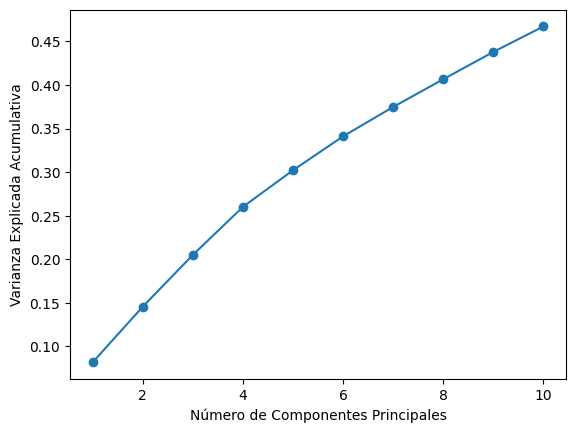

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

In [33]:
# Entrenar el modelo de regresión lineal con las características transformadas por PCA
model1 = LinearRegression()
model1.fit(X_train_pca, y_train)

LinearRegression()

In [34]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model1.predict(X_train_pca)
y_test_pred = model1.predict(X_test_pca)

In [35]:
# Calcula métricas de evaluación
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print(f'MSE en conjunto de entrenamiento: {mse_train:.2f}')
print(f'MSE en conjunto de prueba: {mse_test:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')

MSE en conjunto de entrenamiento: 0.01
MSE en conjunto de prueba: 0.01
R^2: 0.82
MAE: 0.07
